# Tutorial: First Guess

#### June 2023

In [1]:
cd /home

/home


In [39]:
import matplotlib.pyplot as plt
import os 
import pandas as pd
import numpy as np

from core.engine import preprocess, first_guess, get_metrics

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The first step is to preprocess the data, which involves normalizing the PSF, cropping windows centered on candidate companions, and obtaining the initial parameters from the VIP library. In order to accomplish this, we employ the `preprocess()` function as follows:

In [55]:
%%time
window_size = 15
data_path = './data/real/HCI/'
table, cube, psf = preprocess(data_path)
dataset_name = data_path.split('/')[-2]
dataset_name

CPU times: user 51.8 ms, sys: 78.1 ms, total: 130 ms
Wall time: 147 ms


'HCI'

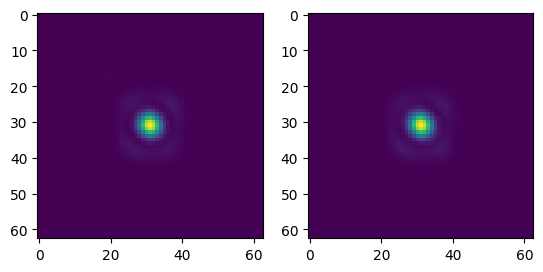

In [56]:
fig, axes = plt.subplots(1, len(psf))

for i, p in enumerate(psf):
    axes[i].imshow(p)
    
psf_filtered = psf[:2]

The following files should be located within the dataset folder (`./data/real/f_dhtau` in this example), using exactly the same names:
- `centered_im.fits`: cube
- `median_unsat.fits`: psf
- `rotnth.fits`: rotation angles

If it is the first time we run the preprocess function, it will compute PCA+ADI using VIP and then store the preprocessed data to avoid preprocessing the dataset again.

We first filter our table to maintain only the coordinates we want to fit.

In [57]:
table = table[table['snr']>3]
table

,x,y,flux,fwhm_mean,snr
1,90.979734,87.349372,31.502232,4.559094,4.930584


Next, we will use the first_guess function to fit our parameters

In [43]:
%%time
first_guess(table, cube, psf_filtered, 
            window_size=window_size, 
            learning_rate=1e-1, 
            epochs=1e6,
            target_folder='./logs/{}'.format(dataset_name),
            verbose=1)

[INFO] Training (x, y) = (384.84 366.86)
input shape:  (None, 80, 14, 14, 1)
Epoch 1/1000000
1/1 [==============================] - 0s 270ms/step - loss: 9.5496 - flux: 278.7835 - std: 0.0925
Epoch 2/1000000
1/1 [==============================] - 0s 7ms/step - loss: 9.2737 - flux: 278.8759 - std: 0.1851
Epoch 3/1000000
1/1 [==============================] - 0s 5ms/step - loss: 9.0055 - flux: 278.9684 - std: 0.2779
Epoch 4/1000000
1/1 [==============================] - 0s 5ms/step - loss: 8.7455 - flux: 279.0611 - std: 0.3712
Epoch 5/1000000
1/1 [==============================] - 0s 5ms/step - loss: 8.4942 - flux: 279.1537 - std: 0.4646
Epoch 6/1000000
1/1 [==============================] - 0s 5ms/step - loss: 8.2520 - flux: 279.2459 - std: 0.5576
Epoch 7/1000000
1/1 [==============================] - 0s 4ms/step - loss: 8.0197 - flux: 279.3376 - std: 0.6499
Epoch 8/1000000
1/1 [==============================] - 0s 5ms/step - loss: 7.7978 - flux: 279.4285 - std: 0.7412
Epoch 9/1000000
1

1/1 [==============================] - 0s 4ms/step - loss: 5.6877 - flux: 282.6176 - std: 1.8296
Epoch 73/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.6856 - flux: 282.6653 - std: 1.8295
Epoch 74/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.6836 - flux: 282.7132 - std: 1.8295
Epoch 75/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.6815 - flux: 282.7612 - std: 1.8295
Epoch 76/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.6794 - flux: 282.8093 - std: 1.8294
Epoch 77/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.6773 - flux: 282.8577 - std: 1.8293
Epoch 78/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.6752 - flux: 282.9061 - std: 1.8291
Epoch 79/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.6732 - flux: 282.9545 - std: 1.8288
Epoch 80/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.6711 - flux: 283.0031 - std

1/1 [==============================] - 0s 5ms/step - loss: 5.5399 - flux: 286.2587 - std: 1.7073
Epoch 144/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.5378 - flux: 286.3130 - std: 1.7052
Epoch 145/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.5357 - flux: 286.3673 - std: 1.7030
Epoch 146/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.5336 - flux: 286.4217 - std: 1.7009
Epoch 147/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.5315 - flux: 286.4761 - std: 1.6988
Epoch 148/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.5294 - flux: 286.5306 - std: 1.6967
Epoch 149/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.5273 - flux: 286.5851 - std: 1.6946
Epoch 150/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.5253 - flux: 286.6397 - std: 1.6925
Epoch 151/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.5232 - flux: 286.69

1/1 [==============================] - 0s 4ms/step - loss: 5.3942 - flux: 290.1920 - std: 1.5541
Epoch 215/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.3922 - flux: 290.2479 - std: 1.5519
Epoch 216/1000000
1/1 [==============================] - 0s 6ms/step - loss: 5.3902 - flux: 290.3038 - std: 1.5497
Epoch 217/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.3882 - flux: 290.3597 - std: 1.5476
Epoch 218/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.3862 - flux: 290.4157 - std: 1.5454
Epoch 219/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.3843 - flux: 290.4716 - std: 1.5432
Epoch 220/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.3823 - flux: 290.5275 - std: 1.5410
Epoch 221/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.3803 - flux: 290.5834 - std: 1.5388
Epoch 222/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.3783 - flux: 290.63

1/1 [==============================] - 0s 4ms/step - loss: 5.2595 - flux: 294.1375 - std: 1.3986
Epoch 286/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2577 - flux: 294.1925 - std: 1.3964
Epoch 287/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2559 - flux: 294.2473 - std: 1.3942
Epoch 288/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2541 - flux: 294.3022 - std: 1.3920
Epoch 289/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2523 - flux: 294.3570 - std: 1.3899
Epoch 290/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2505 - flux: 294.4118 - std: 1.3877
Epoch 291/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2488 - flux: 294.4665 - std: 1.3855
Epoch 292/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2470 - flux: 294.5212 - std: 1.3833
Epoch 293/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.2452 - flux: 294.57

1/1 [==============================] - 0s 5ms/step - loss: 5.1390 - flux: 297.9563 - std: 1.2460
Epoch 357/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.1374 - flux: 298.0088 - std: 1.2438
Epoch 358/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.1358 - flux: 298.0612 - std: 1.2417
Epoch 359/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.1343 - flux: 298.1136 - std: 1.2396
Epoch 360/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.1327 - flux: 298.1660 - std: 1.2375
Epoch 361/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.1311 - flux: 298.2183 - std: 1.2354
Epoch 362/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.1295 - flux: 298.2706 - std: 1.2333
Epoch 363/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.1279 - flux: 298.3228 - std: 1.2312
Epoch 364/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.1264 - flux: 298.37

1/1 [==============================] - 0s 4ms/step - loss: 5.0330 - flux: 301.5772 - std: 1.0993
Epoch 428/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.0316 - flux: 301.6266 - std: 1.0972
Epoch 429/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.0302 - flux: 301.6759 - std: 1.0952
Epoch 430/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.0288 - flux: 301.7253 - std: 1.0932
Epoch 431/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.0274 - flux: 301.7745 - std: 1.0912
Epoch 432/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.0260 - flux: 301.8237 - std: 1.0892
Epoch 433/1000000
1/1 [==============================] - 0s 5ms/step - loss: 5.0246 - flux: 301.8729 - std: 1.0872
Epoch 434/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.0233 - flux: 301.9220 - std: 1.0852
Epoch 435/1000000
1/1 [==============================] - 0s 4ms/step - loss: 5.0219 - flux: 301.97

1/1 [==============================] - 0s 4ms/step - loss: 4.9405 - flux: 304.9672 - std: 0.9600
Epoch 499/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.9392 - flux: 305.0132 - std: 0.9581
Epoch 500/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.9380 - flux: 305.0592 - std: 0.9562
Epoch 501/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.9368 - flux: 305.1052 - std: 0.9543
Epoch 502/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.9356 - flux: 305.1510 - std: 0.9524
Epoch 503/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.9344 - flux: 305.1969 - std: 0.9505
Epoch 504/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.9332 - flux: 305.2426 - std: 0.9486
Epoch 505/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.9320 - flux: 305.2884 - std: 0.9467
Epoch 506/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.9308 - flux: 305.33

1/1 [==============================] - 0s 4ms/step - loss: 4.8602 - flux: 308.1151 - std: 0.8291
Epoch 570/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.8592 - flux: 308.1577 - std: 0.8273
Epoch 571/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.8581 - flux: 308.2003 - std: 0.8255
Epoch 572/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.8571 - flux: 308.2428 - std: 0.8237
Epoch 573/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.8560 - flux: 308.2852 - std: 0.8219
Epoch 574/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.8550 - flux: 308.3276 - std: 0.8202
Epoch 575/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.8540 - flux: 308.3700 - std: 0.8184
Epoch 576/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.8529 - flux: 308.4123 - std: 0.8166
Epoch 577/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.8519 - flux: 308.45

1/1 [==============================] - 0s 4ms/step - loss: 4.7910 - flux: 311.0218 - std: 0.7067
Epoch 641/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7901 - flux: 311.0610 - std: 0.7050
Epoch 642/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7892 - flux: 311.1002 - std: 0.7034
Epoch 643/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7883 - flux: 311.1393 - std: 0.7017
Epoch 644/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7874 - flux: 311.1785 - std: 0.7000
Epoch 645/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7865 - flux: 311.2175 - std: 0.6984
Epoch 646/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7856 - flux: 311.2565 - std: 0.6967
Epoch 647/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7847 - flux: 311.2955 - std: 0.6951
Epoch 648/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7838 - flux: 311.33

1/1 [==============================] - 0s 4ms/step - loss: 4.7314 - flux: 313.6943 - std: 0.5930
Epoch 712/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7306 - flux: 313.7303 - std: 0.5914
Epoch 713/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7299 - flux: 313.7662 - std: 0.5899
Epoch 714/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7291 - flux: 313.8022 - std: 0.5883
Epoch 715/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7283 - flux: 313.8380 - std: 0.5868
Epoch 716/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.7276 - flux: 313.8739 - std: 0.5853
Epoch 717/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7268 - flux: 313.9097 - std: 0.5837
Epoch 718/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.7260 - flux: 313.9454 - std: 0.5822
Epoch 719/1000000
1/1 [==============================] - 0s 6ms/step - loss: 4.7253 - flux: 313.98

1/1 [==============================] - 0s 5ms/step - loss: 4.6805 - flux: 316.1420 - std: 0.4879
Epoch 783/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6798 - flux: 316.1750 - std: 0.4864
Epoch 784/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6792 - flux: 316.2078 - std: 0.4850
Epoch 785/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6785 - flux: 316.2407 - std: 0.4836
Epoch 786/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6779 - flux: 316.2734 - std: 0.4822
Epoch 787/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6772 - flux: 316.3062 - std: 0.4808
Epoch 788/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6766 - flux: 316.3389 - std: 0.4794
Epoch 789/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6759 - flux: 316.3716 - std: 0.4780
Epoch 790/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6753 - flux: 316.40

1/1 [==============================] - 0s 5ms/step - loss: 4.6372 - flux: 318.3749 - std: 0.3913
Epoch 854/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6367 - flux: 318.4048 - std: 0.3900
Epoch 855/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6361 - flux: 318.4347 - std: 0.3887
Epoch 856/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6356 - flux: 318.4646 - std: 0.3874
Epoch 857/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6350 - flux: 318.4944 - std: 0.3861
Epoch 858/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.6345 - flux: 318.5243 - std: 0.3848
Epoch 859/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6339 - flux: 318.5540 - std: 0.3836
Epoch 860/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6334 - flux: 318.5837 - std: 0.3823
Epoch 861/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6328 - flux: 318.61

1/1 [==============================] - 0s 4ms/step - loss: 4.6008 - flux: 320.4020 - std: 0.3033
Epoch 925/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.6004 - flux: 320.4291 - std: 0.3021
Epoch 926/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5999 - flux: 320.4562 - std: 0.3009
Epoch 927/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5994 - flux: 320.4833 - std: 0.2997
Epoch 928/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5990 - flux: 320.5103 - std: 0.2986
Epoch 929/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5985 - flux: 320.5373 - std: 0.2974
Epoch 930/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5981 - flux: 320.5642 - std: 0.2962
Epoch 931/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5976 - flux: 320.5911 - std: 0.2951
Epoch 932/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5971 - flux: 320.61

1/1 [==============================] - 0s 4ms/step - loss: 4.5705 - flux: 322.2321 - std: 0.2236
Epoch 996/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5701 - flux: 322.2565 - std: 0.2225
Epoch 997/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5697 - flux: 322.2809 - std: 0.2215
Epoch 998/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5694 - flux: 322.3052 - std: 0.2204
Epoch 999/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5690 - flux: 322.3295 - std: 0.2193
Epoch 1000/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5686 - flux: 322.3538 - std: 0.2183
Epoch 1001/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5682 - flux: 322.3780 - std: 0.2172
Epoch 1002/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5678 - flux: 322.4022 - std: 0.2162
Epoch 1003/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5674 - flux: 32

1/1 [==============================] - 0s 4ms/step - loss: 4.5459 - flux: 323.8516 - std: 0.1531
Epoch 1066/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5456 - flux: 323.8734 - std: 0.1521
Epoch 1067/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5452 - flux: 323.8952 - std: 0.1512
Epoch 1068/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5449 - flux: 323.9170 - std: 0.1502
Epoch 1069/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5446 - flux: 323.9388 - std: 0.1493
Epoch 1070/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5443 - flux: 323.9604 - std: 0.1483
Epoch 1071/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5440 - flux: 323.9821 - std: 0.1474
Epoch 1072/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5437 - flux: 324.0037 - std: 0.1464
Epoch 1073/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5434 - flux

1/1 [==============================] - 0s 4ms/step - loss: 4.5258 - flux: 325.2956 - std: 0.0902
Epoch 1136/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5256 - flux: 325.3150 - std: 0.0894
Epoch 1137/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5253 - flux: 325.3344 - std: 0.0886
Epoch 1138/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5250 - flux: 325.3537 - std: 0.0877
Epoch 1139/1000000
1/1 [==============================] - 0s 7ms/step - loss: 4.5248 - flux: 325.3730 - std: 0.0869
Epoch 1140/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5245 - flux: 325.3923 - std: 0.0860
Epoch 1141/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5243 - flux: 325.4115 - std: 0.0852
Epoch 1142/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5240 - flux: 325.4307 - std: 0.0844
Epoch 1143/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5238 - flux

1/1 [==============================] - 0s 4ms/step - loss: 4.5097 - flux: 326.5731 - std: 0.0349
Epoch 1206/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5095 - flux: 326.5901 - std: 0.0341
Epoch 1207/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5093 - flux: 326.6072 - std: 0.0334
Epoch 1208/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5091 - flux: 326.6242 - std: 0.0326
Epoch 1209/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5089 - flux: 326.6412 - std: 0.0319
Epoch 1210/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5087 - flux: 326.6582 - std: 0.0312
Epoch 1211/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.5085 - flux: 326.6751 - std: 0.0304
Epoch 1212/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5083 - flux: 326.6920 - std: 0.0297
Epoch 1213/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.5081 - flux

1/1 [==============================] - 0s 6ms/step - loss: 4.4969 - flux: 327.6935 - std: -0.0135
Epoch 1276/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4968 - flux: 327.7084 - std: -0.0141
Epoch 1277/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4966 - flux: 327.7233 - std: -0.0148
Epoch 1278/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4965 - flux: 327.7382 - std: -0.0154
Epoch 1279/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4963 - flux: 327.7531 - std: -0.0161
Epoch 1280/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4961 - flux: 327.7678 - std: -0.0167
Epoch 1281/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4960 - flux: 327.7826 - std: -0.0173
Epoch 1282/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4958 - flux: 327.7974 - std: -0.0180
Epoch 1283/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.495

1/1 [==============================] - 0s 5ms/step - loss: 4.4870 - flux: 328.6677 - std: -0.0553
Epoch 1346/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4869 - flux: 328.6806 - std: -0.0559
Epoch 1347/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4867 - flux: 328.6934 - std: -0.0564
Epoch 1348/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4866 - flux: 328.7063 - std: -0.0570
Epoch 1349/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4865 - flux: 328.7191 - std: -0.0575
Epoch 1350/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4864 - flux: 328.7319 - std: -0.0581
Epoch 1351/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4862 - flux: 328.7447 - std: -0.0586
Epoch 1352/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4861 - flux: 328.7574 - std: -0.0592
Epoch 1353/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.486

1/1 [==============================] - 0s 4ms/step - loss: 4.4793 - flux: 329.5068 - std: -0.0911
Epoch 1416/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4793 - flux: 329.5179 - std: -0.0916
Epoch 1417/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4792 - flux: 329.5290 - std: -0.0920
Epoch 1418/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4791 - flux: 329.5400 - std: -0.0925
Epoch 1419/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4790 - flux: 329.5510 - std: -0.0930
Epoch 1420/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4789 - flux: 329.5620 - std: -0.0934
Epoch 1421/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4788 - flux: 329.5729 - std: -0.0939
Epoch 1422/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4787 - flux: 329.5838 - std: -0.0944
Epoch 1423/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.478

1/1 [==============================] - 0s 5ms/step - loss: 4.4736 - flux: 330.2232 - std: -0.1214
Epoch 1486/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4735 - flux: 330.2326 - std: -0.1218
Epoch 1487/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4734 - flux: 330.2420 - std: -0.1222
Epoch 1488/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4734 - flux: 330.2513 - std: -0.1226
Epoch 1489/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4733 - flux: 330.2607 - std: -0.1230
Epoch 1490/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4732 - flux: 330.2700 - std: -0.1234
Epoch 1491/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4732 - flux: 330.2792 - std: -0.1238
Epoch 1492/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4731 - flux: 330.2885 - std: -0.1242
Epoch 1493/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.473

1/1 [==============================] - 0s 4ms/step - loss: 4.4693 - flux: 330.8289 - std: -0.1469
Epoch 1556/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4693 - flux: 330.8369 - std: -0.1472
Epoch 1557/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4692 - flux: 330.8448 - std: -0.1475
Epoch 1558/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4692 - flux: 330.8526 - std: -0.1478
Epoch 1559/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4691 - flux: 330.8605 - std: -0.1482
Epoch 1560/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4691 - flux: 330.8683 - std: -0.1485
Epoch 1561/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4690 - flux: 330.8761 - std: -0.1488
Epoch 1562/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4690 - flux: 330.8839 - std: -0.1492
Epoch 1563/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.468

1/1 [==============================] - 0s 4ms/step - loss: 4.4662 - flux: 331.3365 - std: -0.1680
Epoch 1626/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4662 - flux: 331.3431 - std: -0.1683
Epoch 1627/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4662 - flux: 331.3496 - std: -0.1686
Epoch 1628/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4661 - flux: 331.3562 - std: -0.1688
Epoch 1629/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4661 - flux: 331.3627 - std: -0.1691
Epoch 1630/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4661 - flux: 331.3693 - std: -0.1694
Epoch 1631/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4660 - flux: 331.3758 - std: -0.1696
Epoch 1632/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4660 - flux: 331.3823 - std: -0.1699
Epoch 1633/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.465

1/1 [==============================] - 0s 4ms/step - loss: 4.4640 - flux: 331.7577 - std: -0.1854
Epoch 1696/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4640 - flux: 331.7631 - std: -0.1857
Epoch 1697/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4640 - flux: 331.7686 - std: -0.1859
Epoch 1698/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4640 - flux: 331.7740 - std: -0.1861
Epoch 1699/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4639 - flux: 331.7794 - std: -0.1863
Epoch 1700/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4639 - flux: 331.7847 - std: -0.1865
Epoch 1701/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4639 - flux: 331.7901 - std: -0.1868
Epoch 1702/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4639 - flux: 331.7955 - std: -0.1870
Epoch 1703/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.463

1/1 [==============================] - 0s 4ms/step - loss: 4.4625 - flux: 332.1039 - std: -0.1996
Epoch 1766/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4625 - flux: 332.1084 - std: -0.1998
Epoch 1767/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4625 - flux: 332.1129 - std: -0.2000
Epoch 1768/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4625 - flux: 332.1172 - std: -0.2002
Epoch 1769/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4624 - flux: 332.1217 - std: -0.2004
Epoch 1770/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4624 - flux: 332.1261 - std: -0.2005
Epoch 1771/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4624 - flux: 332.1305 - std: -0.2007
Epoch 1772/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4624 - flux: 332.1349 - std: -0.2009
Epoch 1773/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.462

1/1 [==============================] - 0s 4ms/step - loss: 4.4615 - flux: 332.3859 - std: -0.2111
Epoch 1836/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4615 - flux: 332.3895 - std: -0.2113
Epoch 1837/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4615 - flux: 332.3931 - std: -0.2114
Epoch 1838/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4614 - flux: 332.3967 - std: -0.2116
Epoch 1839/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4614 - flux: 332.4003 - std: -0.2117
Epoch 1840/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4614 - flux: 332.4038 - std: -0.2119
Epoch 1841/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4614 - flux: 332.4074 - std: -0.2120
Epoch 1842/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4614 - flux: 332.4109 - std: -0.2121
Epoch 1843/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.461

1/1 [==============================] - 0s 4ms/step - loss: 4.4608 - flux: 332.6133 - std: -0.2203
Epoch 1906/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4608 - flux: 332.6161 - std: -0.2205
Epoch 1907/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4608 - flux: 332.6190 - std: -0.2206
Epoch 1908/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4608 - flux: 332.6219 - std: -0.2207
Epoch 1909/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4607 - flux: 332.6248 - std: -0.2208
Epoch 1910/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4607 - flux: 332.6277 - std: -0.2209
Epoch 1911/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4607 - flux: 332.6305 - std: -0.2210
Epoch 1912/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4607 - flux: 332.6334 - std: -0.2211
Epoch 1913/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.460

1/1 [==============================] - 0s 4ms/step - loss: 4.4603 - flux: 332.7949 - std: -0.2276
Epoch 1976/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4603 - flux: 332.7972 - std: -0.2277
Epoch 1977/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4603 - flux: 332.7995 - std: -0.2278
Epoch 1978/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4603 - flux: 332.8017 - std: -0.2279
Epoch 1979/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4603 - flux: 332.8040 - std: -0.2280
Epoch 1980/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4603 - flux: 332.8063 - std: -0.2281
Epoch 1981/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4603 - flux: 332.8086 - std: -0.2282
Epoch 1982/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4603 - flux: 332.8109 - std: -0.2283
Epoch 1983/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.460

1/1 [==============================] - 0s 5ms/step - loss: 4.4600 - flux: 332.9385 - std: -0.2334
Epoch 2046/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4600 - flux: 332.9403 - std: -0.2335
Epoch 2047/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4600 - flux: 332.9421 - std: -0.2335
Epoch 2048/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4600 - flux: 332.9439 - std: -0.2336
Epoch 2049/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4600 - flux: 332.9456 - std: -0.2337
Epoch 2050/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4600 - flux: 332.9474 - std: -0.2337
Epoch 2051/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4600 - flux: 332.9492 - std: -0.2338
Epoch 2052/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4600 - flux: 332.9510 - std: -0.2339
Epoch 2053/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.460

1/1 [==============================] - 0s 4ms/step - loss: 4.4599 - flux: 333.0509 - std: -0.2379
Epoch 2116/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4599 - flux: 333.0523 - std: -0.2379
Epoch 2117/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4599 - flux: 333.0537 - std: -0.2380
Epoch 2118/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4599 - flux: 333.0551 - std: -0.2380
Epoch 2119/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4599 - flux: 333.0565 - std: -0.2381
Epoch 2120/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4599 - flux: 333.0579 - std: -0.2381
Epoch 2121/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4598 - flux: 333.0593 - std: -0.2382
Epoch 2122/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4598 - flux: 333.0607 - std: -0.2382
Epoch 2123/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 4ms/step - loss: 4.4598 - flux: 333.1380 - std: -0.2413
Epoch 2186/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4598 - flux: 333.1391 - std: -0.2414
Epoch 2187/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4597 - flux: 333.1402 - std: -0.2414
Epoch 2188/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4597 - flux: 333.1413 - std: -0.2414
Epoch 2189/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4597 - flux: 333.1423 - std: -0.2415
Epoch 2190/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.1434 - std: -0.2415
Epoch 2191/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4597 - flux: 333.1445 - std: -0.2416
Epoch 2192/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.1455 - std: -0.2416
Epoch 2193/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 4ms/step - loss: 4.4597 - flux: 333.2048 - std: -0.2439
Epoch 2256/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.2056 - std: -0.2440
Epoch 2257/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.2065 - std: -0.2440
Epoch 2258/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4597 - flux: 333.2073 - std: -0.2440
Epoch 2259/1000000
1/1 [==============================] - 0s 6ms/step - loss: 4.4597 - flux: 333.2081 - std: -0.2441
Epoch 2260/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.2089 - std: -0.2441
Epoch 2261/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.2097 - std: -0.2441
Epoch 2262/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4597 - flux: 333.2105 - std: -0.2442
Epoch 2263/1000000
1/1 [==============================] - 0s 6ms/step - loss: 4.459

1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.2554 - std: -0.2459
Epoch 2326/1000000
1/1 [==============================] - 0s 8ms/step - loss: 4.4596 - flux: 333.2560 - std: -0.2460
Epoch 2327/1000000
1/1 [==============================] - 0s 6ms/step - loss: 4.4596 - flux: 333.2567 - std: -0.2460
Epoch 2328/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.2573 - std: -0.2460
Epoch 2329/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.2579 - std: -0.2460
Epoch 2330/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2585 - std: -0.2461
Epoch 2331/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.2591 - std: -0.2461
Epoch 2332/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.2598 - std: -0.2461
Epoch 2333/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2934 - std: -0.2474
Epoch 2396/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2938 - std: -0.2474
Epoch 2397/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2943 - std: -0.2475
Epoch 2398/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2947 - std: -0.2475
Epoch 2399/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2952 - std: -0.2475
Epoch 2400/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2957 - std: -0.2475
Epoch 2401/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2961 - std: -0.2475
Epoch 2402/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.2966 - std: -0.2475
Epoch 2403/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3215 - std: -0.2485
Epoch 2466/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3218 - std: -0.2485
Epoch 2467/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3222 - std: -0.2485
Epoch 2468/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3225 - std: -0.2486
Epoch 2469/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3228 - std: -0.2486
Epoch 2470/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3232 - std: -0.2486
Epoch 2471/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3235 - std: -0.2486
Epoch 2472/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.3238 - std: -0.2486
Epoch 2473/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3420 - std: -0.2493
Epoch 2536/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3423 - std: -0.2493
Epoch 2537/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3426 - std: -0.2493
Epoch 2538/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3428 - std: -0.2493
Epoch 2539/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3430 - std: -0.2494
Epoch 2540/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.3433 - std: -0.2494
Epoch 2541/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3435 - std: -0.2494
Epoch 2542/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.3438 - std: -0.2494
Epoch 2543/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3569 - std: -0.2499
Epoch 2606/1000000
1/1 [==============================] - 0s 5ms/step - loss: 4.4596 - flux: 333.3571 - std: -0.2499
Epoch 2607/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3573 - std: -0.2499
Epoch 2608/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3575 - std: -0.2499
Epoch 2609/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3576 - std: -0.2499
Epoch 2610/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3578 - std: -0.2499
Epoch 2611/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3580 - std: -0.2499
Epoch 2612/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.4596 - flux: 333.3582 - std: -0.2499
Epoch 2613/1000000
1/1 [==============================] - 0s 4ms/step - loss: 4.459

1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - flux: 1.7261 - std: 0.1406
Epoch 38/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - flux: 1.7222 - std: 0.1397
Epoch 39/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - flux: 1.7187 - std: 0.1393
Epoch 40/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - flux: 1.7158 - std: 0.1396
Epoch 41/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.7133 - std: 0.1402
Epoch 42/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.7109 - std: 0.1409
Epoch 43/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.7083 - std: 0.1412
Epoch 44/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - flux: 1.7054 - std: 0.1411
Epoch 45/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - flux: 1.7023 - std: 0.1406
Epoch 46/

1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.6875 - std: 0.1407
Epoch 111/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.6874 - std: 0.1407
Epoch 112/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.6873 - std: 0.1407
Epoch 113/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.6872 - std: 0.1408
Epoch 114/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - flux: 1.6871 - std: 0.1408
Epoch 115/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - flux: 1.6870 - std: 0.1407
Epoch 116/1000000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - flux: 1.6868 - std: 0.1407
Epoch 117/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - flux: 1.6868 - std: 0.1407
Epoch 118/1000000
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - flux: 1.6867 - std: 0.1407
E

,x,y,flux,fwhm_mean,snr,optimal_flux
0,384.839783,366.859299,278.691128,4.129513,68.073130,333.359314
3,548.480927,731.762964,1.651202,4.806724,23.831788,1.686630


## Visualizing results

In [58]:
table

,x,y,flux,fwhm_mean,snr
1,90.979734,87.349372,31.502232,4.559094,4.930584


In [67]:
index = 1
model_path = f'./logs/{dataset_name}/model_{index}/'

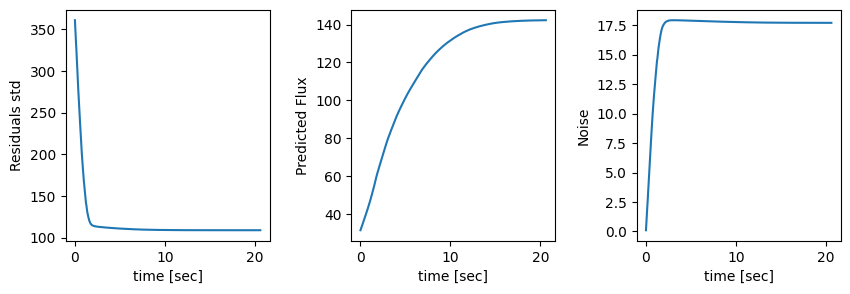

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3),
                         gridspec_kw={'hspace': 0, 'wspace': 0.4})

ylabels = ['Residuals std', 'Predicted Flux', 'Noise']
for i, metric in enumerate(['epoch_loss', 'epoch_flux', 'epoch_std']):
    train_metrics = get_metrics(f'{model_path}/logs/train/', show_keys=False, metric_name=metric)
    
    time = (train_metrics['wall_time'].values -train_metrics['wall_time'].values[0]) 
    axes[i].plot(time, train_metrics['value'].values)
    axes[i].set_xlabel('time [sec]')
    axes[i].set_ylabel(ylabels[i])


In [69]:
from core.engine import inference_step

In [70]:
fake_comp, real_comp, fluxes = inference_step(cube, psf_filtered, table.iloc[0]['x'], table.iloc[0]['y'], 
                                              model_path=model_path, window_size=window_size)

input shape:  (None, 90, 14, 14, 1)
1/1 [==============================] - 0s 25ms/step


In [71]:
np.mean(fluxes)

142.25089

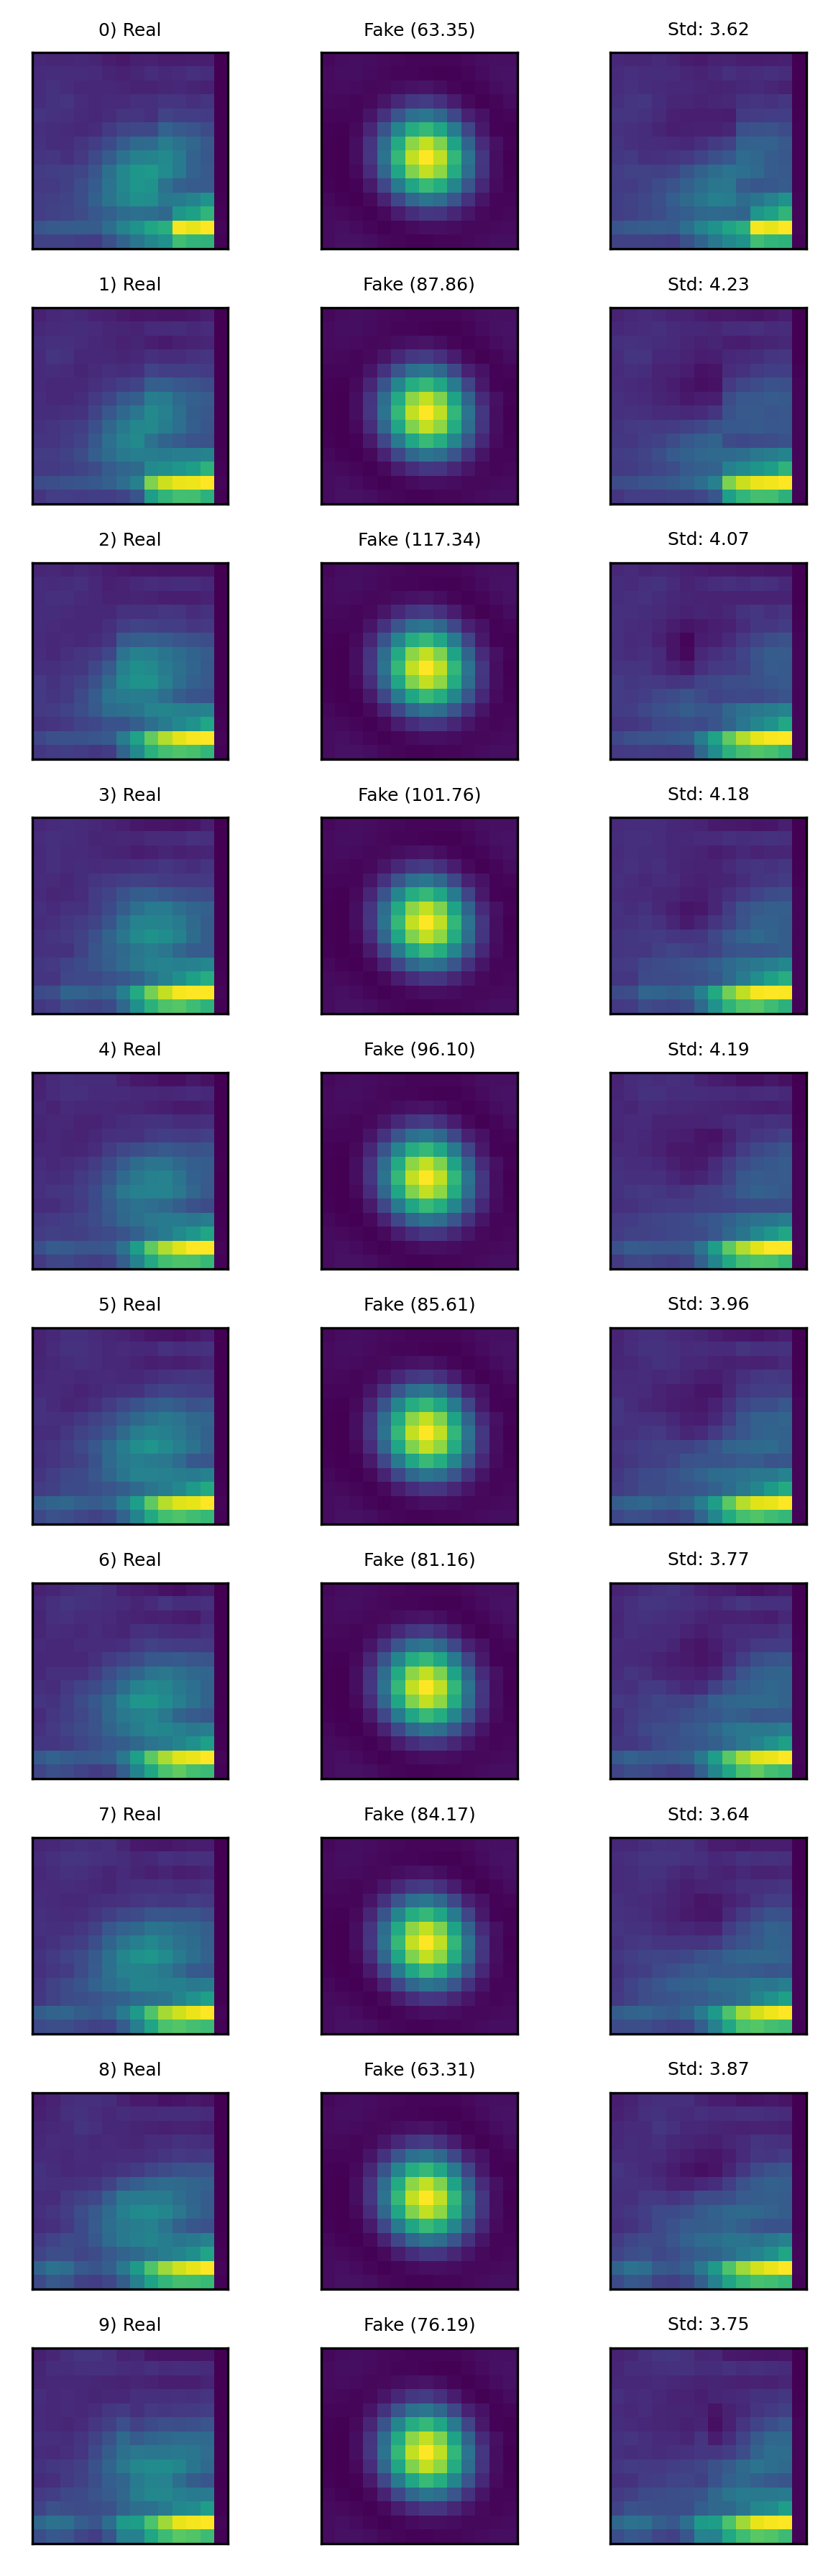

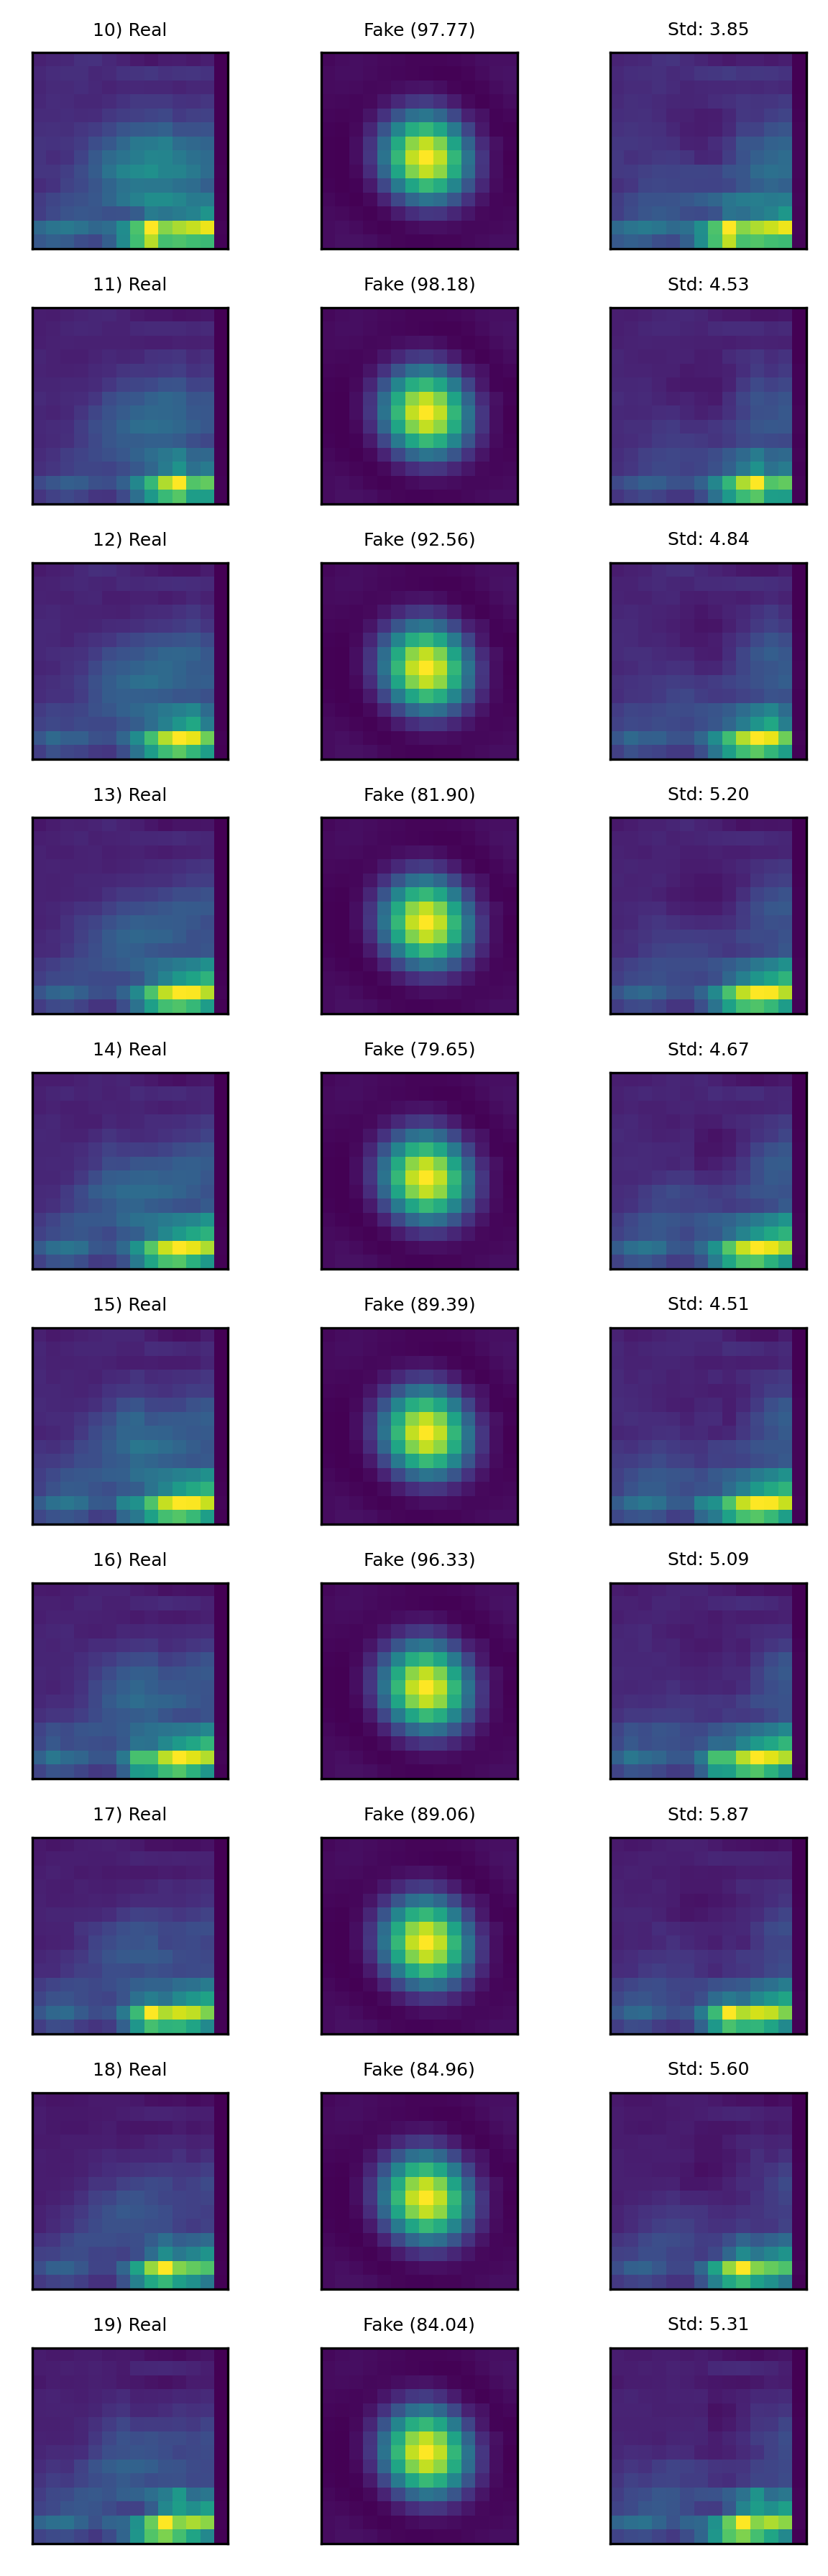

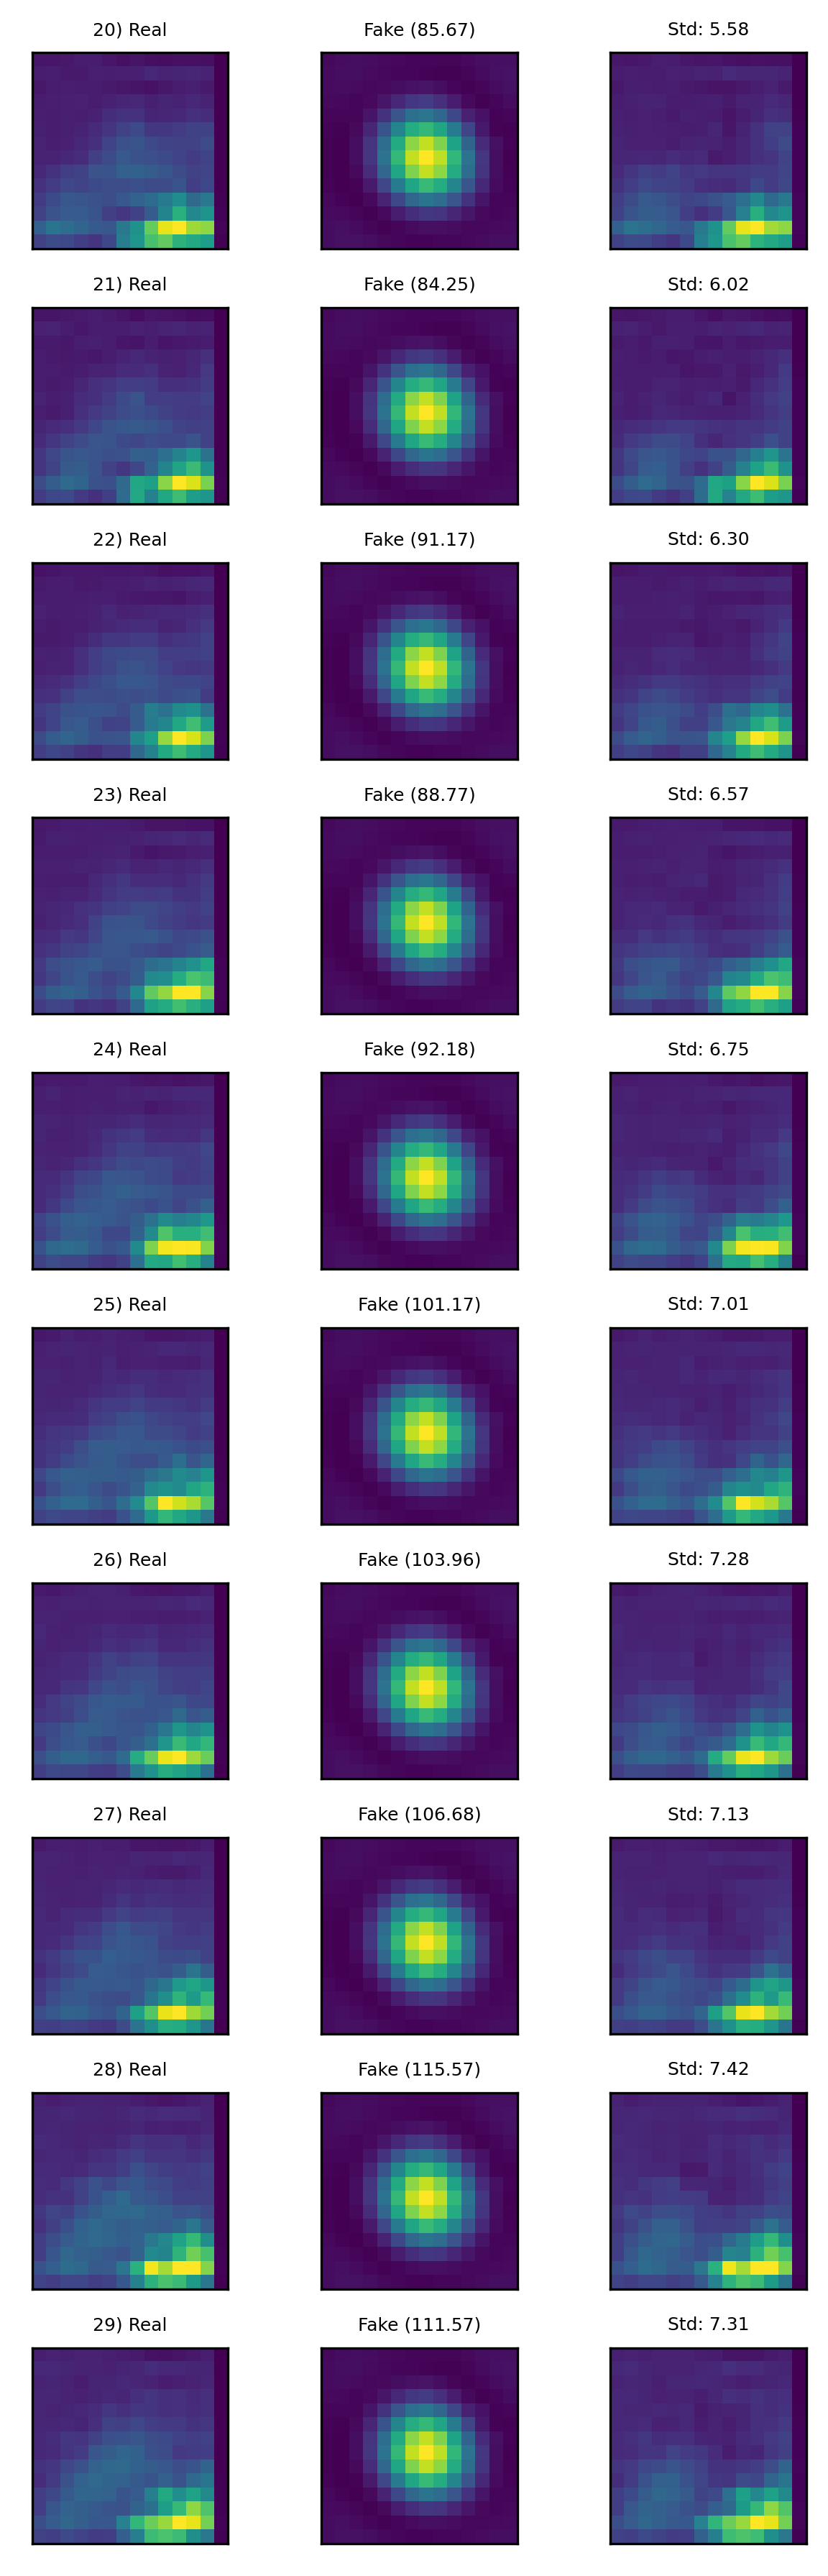

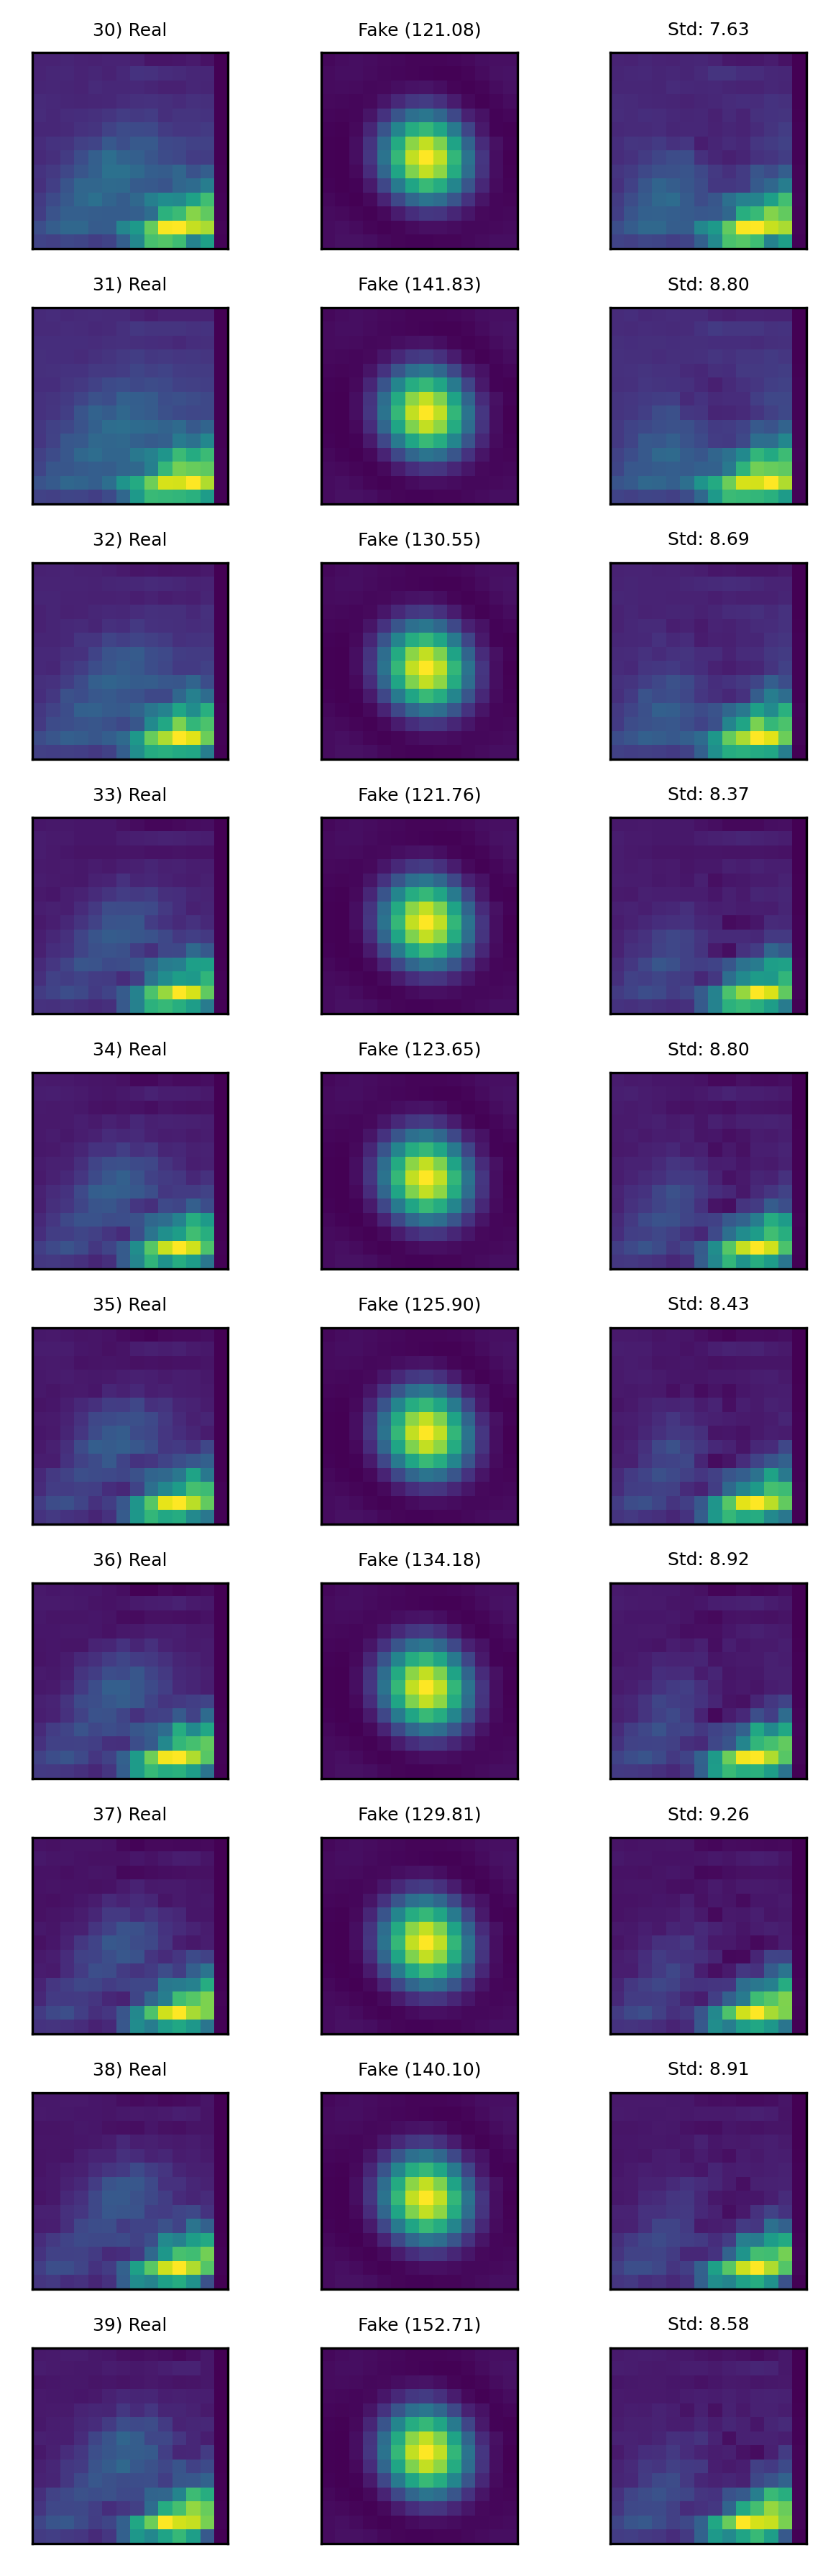

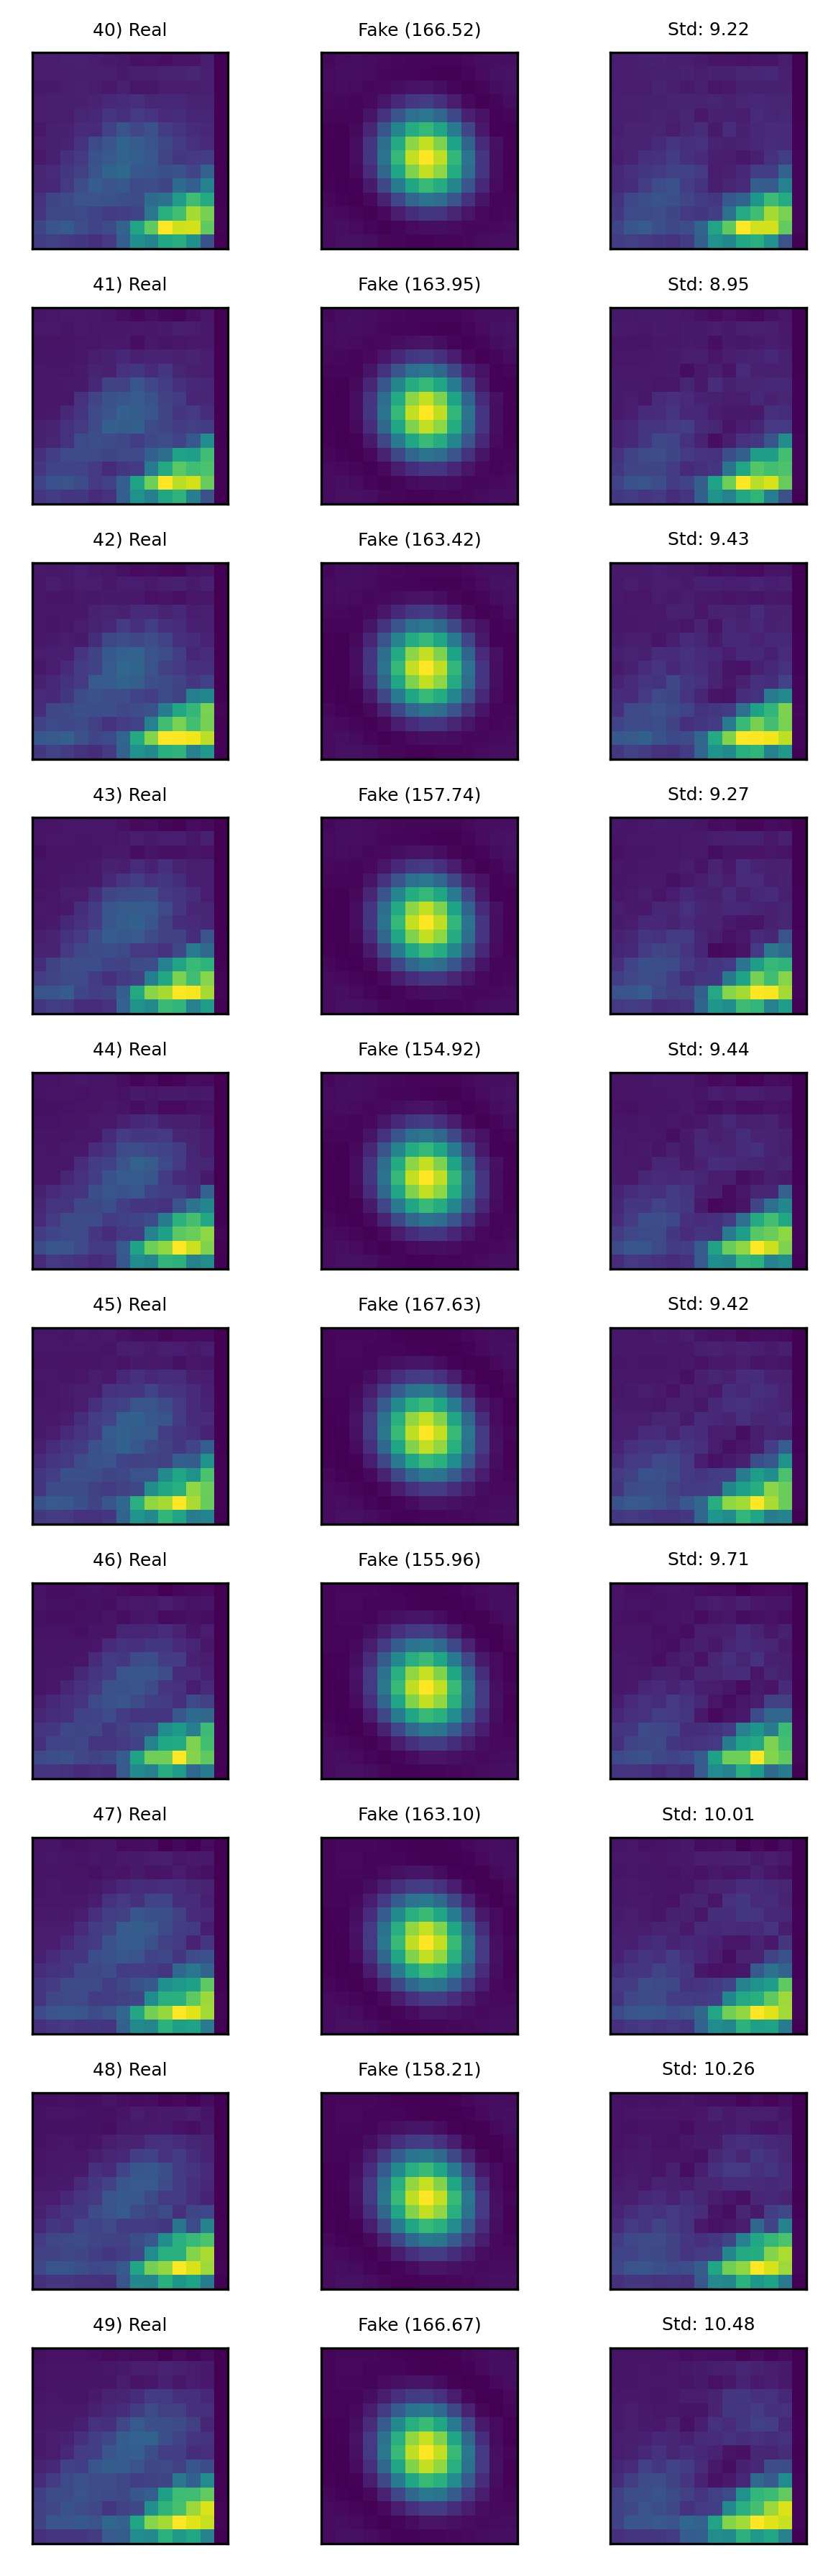

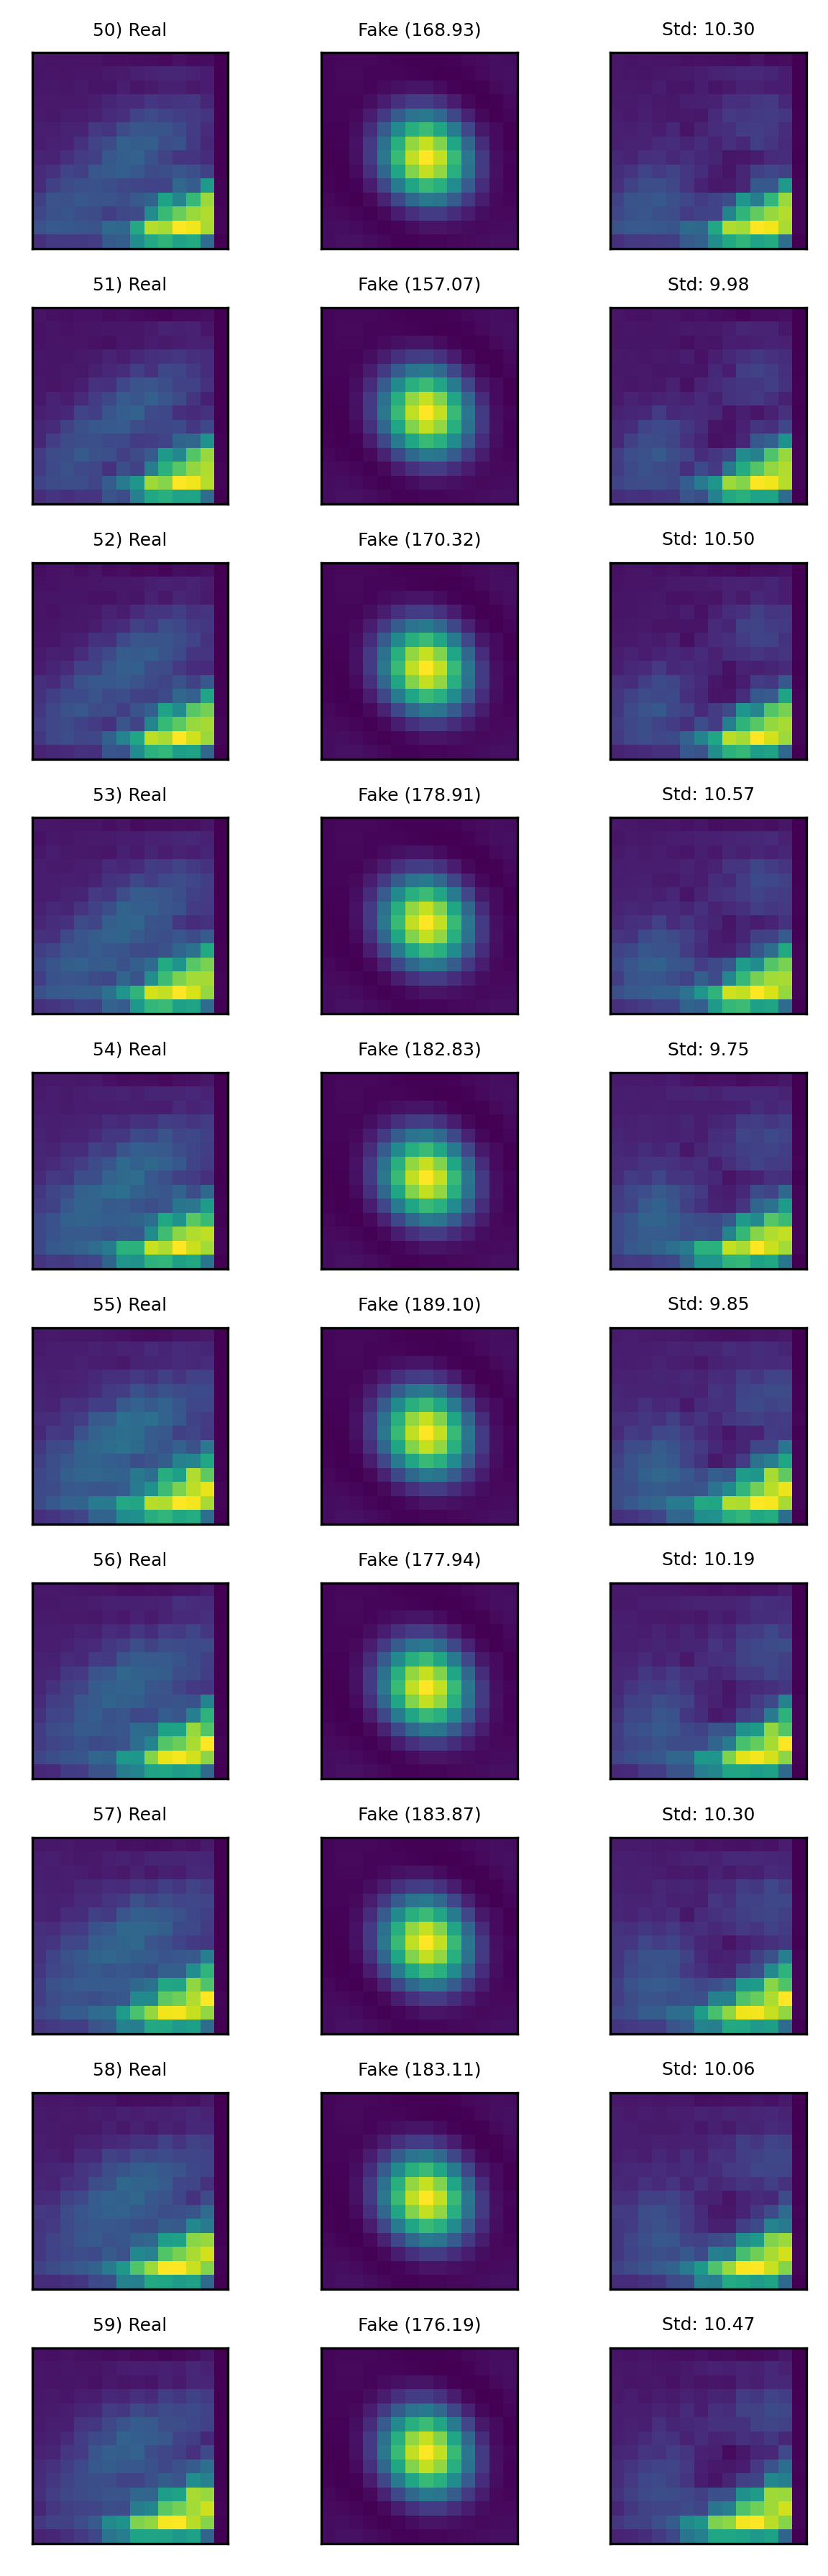

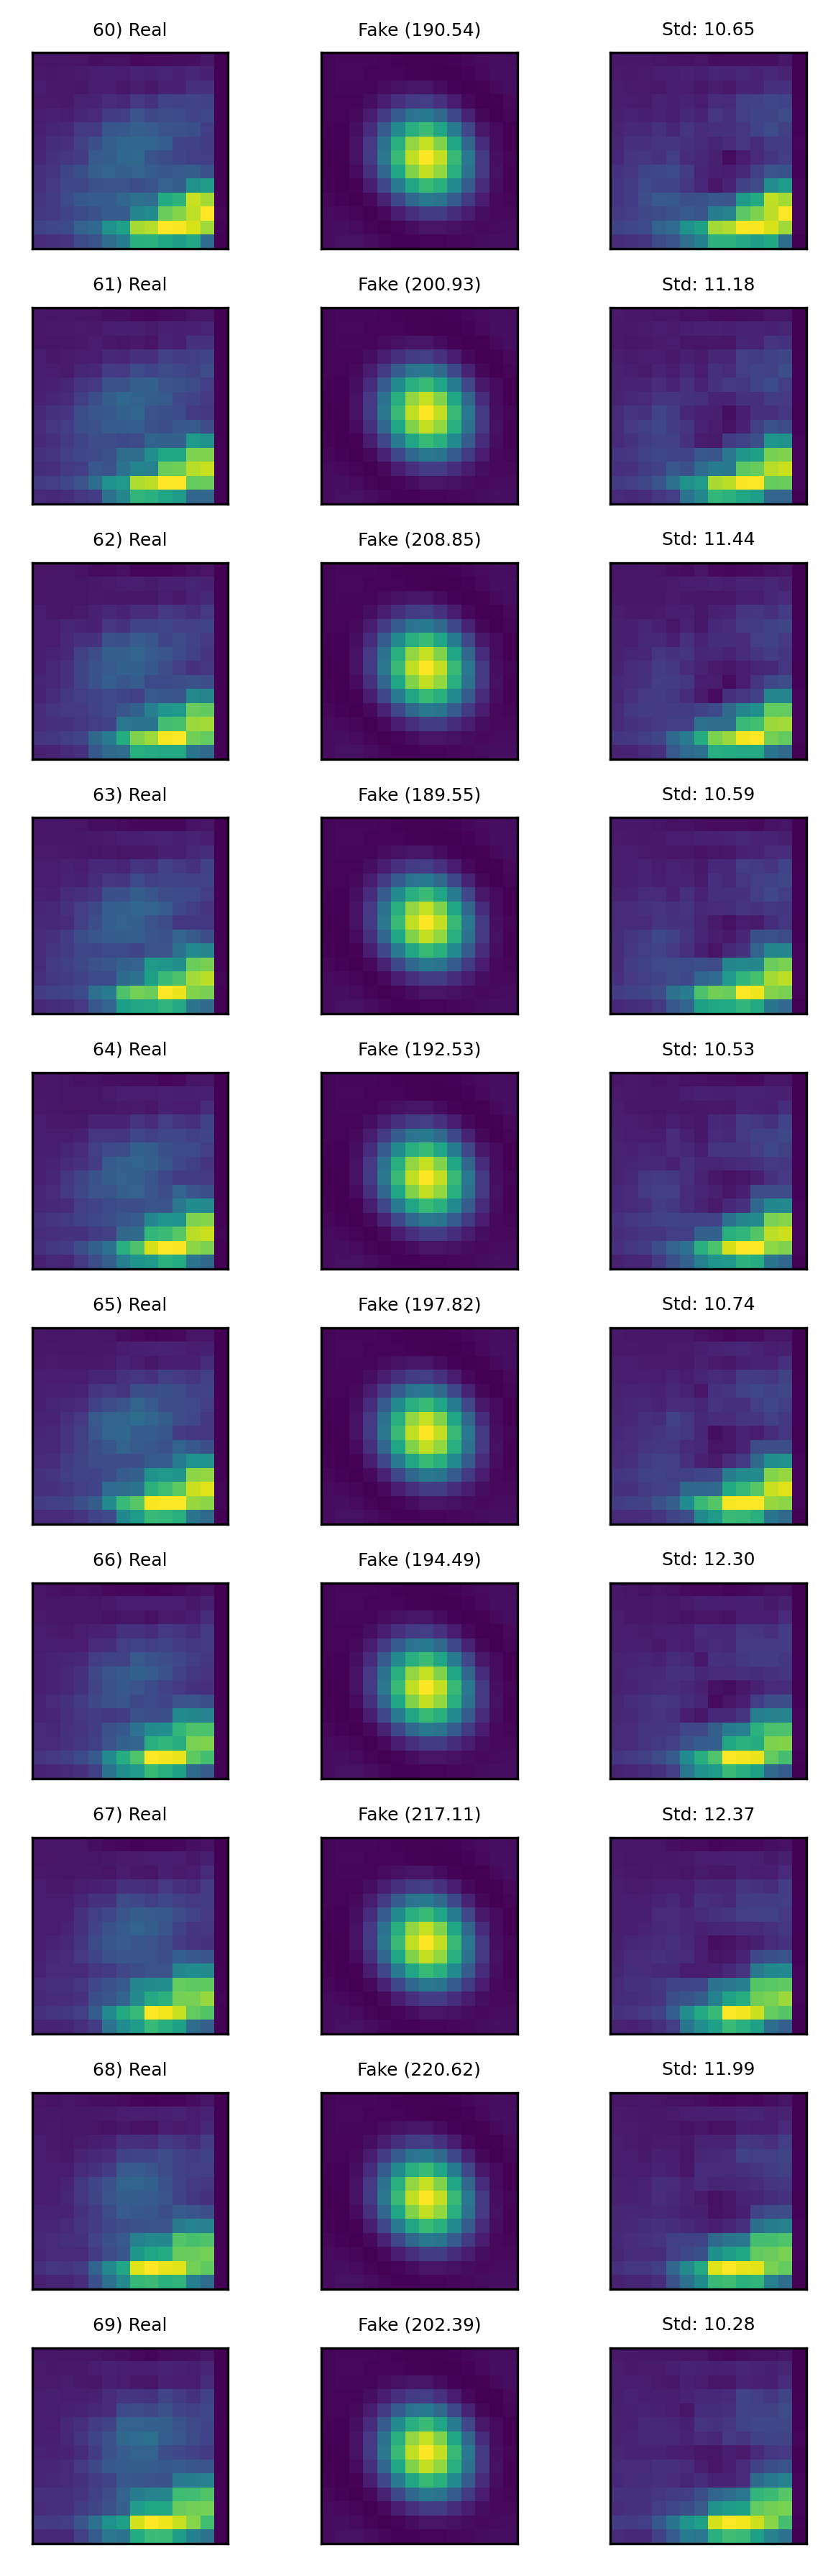

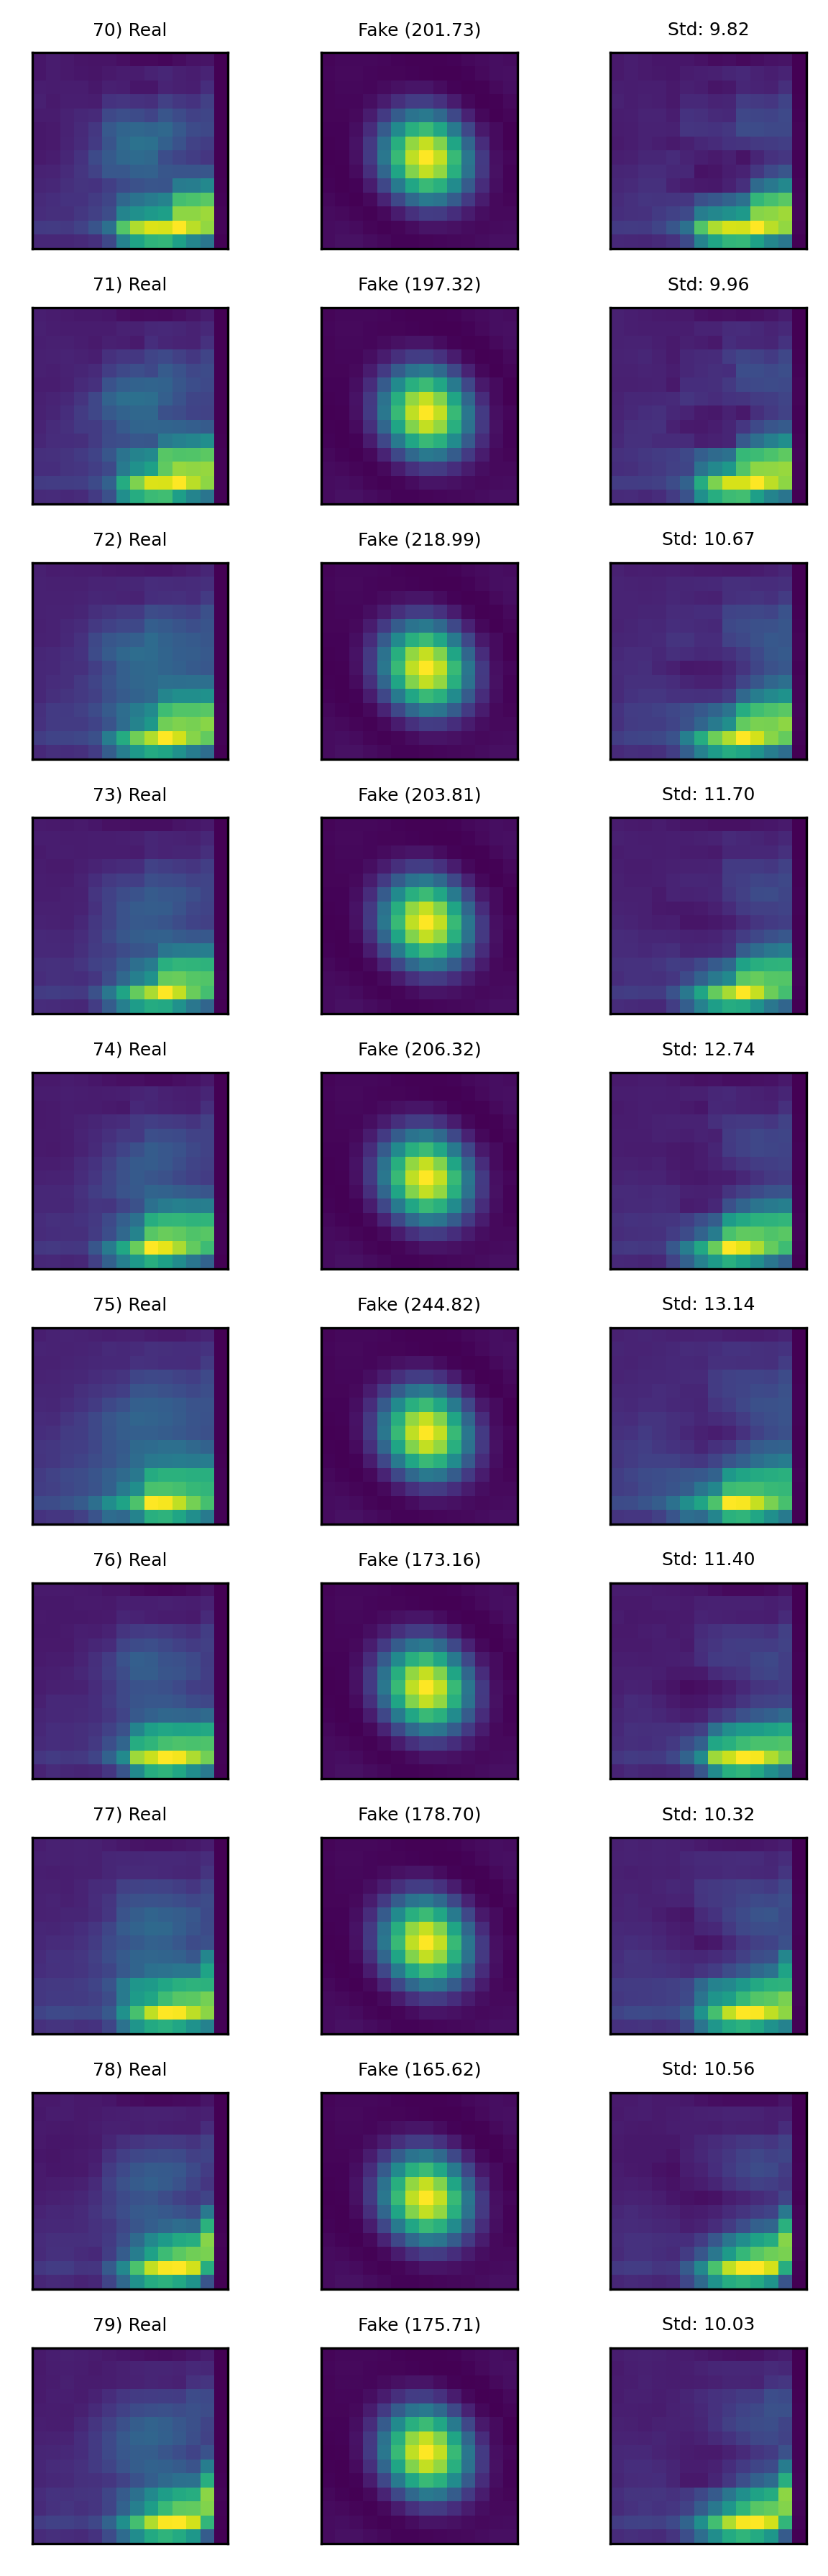

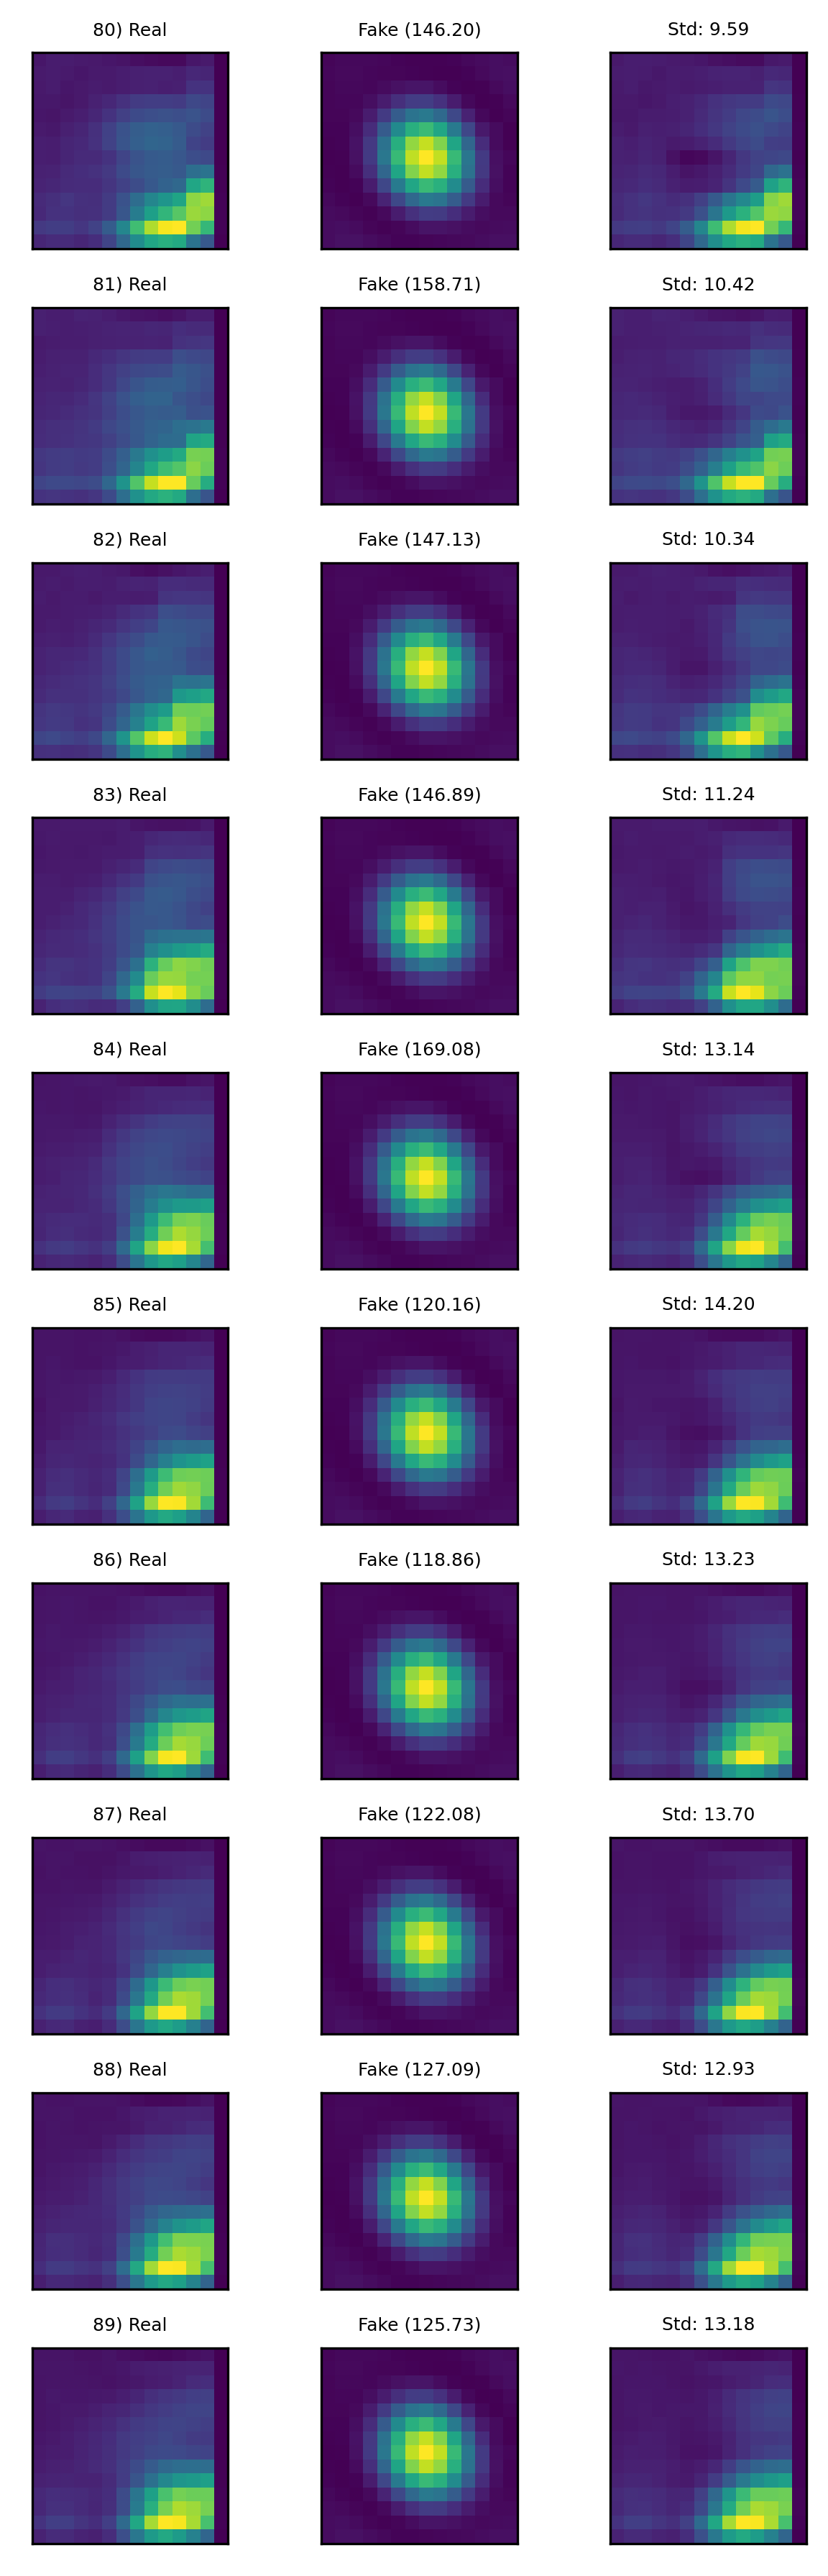

In [74]:
Ntotal = 10
fs = 6
pivots = np.arange(0, fake_comp.shape[0], Ntotal)

os.makedirs(os.path.join(model_path, 'results'), exist_ok=True)
for start in pivots:
    
    fig, axes = plt.subplots(Ntotal, 3, dpi=300, figsize=(15, 15),sharex=True, sharey=True,
                            gridspec_kw={'hspace': 0.3, 'wspace': -0.85})


    for i, N in enumerate(range(start, start+Ntotal)):

        vmin = real_comp[N].min()
        vmax = real_comp[N].max()

        axes[i][0].imshow(real_comp[N])#, vmin=vmin, vmax=vmax)
        axes[i][0].set_title(f'{N}) Real', fontsize=fs)

        axes[i][1].imshow(fake_comp[N])#, vmin=vmin, vmax=vmax)
        axes[i][1].set_title('Fake ({:.2f})'.format(fluxes[N]), fontsize=fs)

        residuals = real_comp[N]-fake_comp[N]
        im = axes[i][2].imshow(residuals)#, vmin=vmin, vmax=vmax)
        axes[i][2].set_title('Std: {:.2f}'.format(np.std(residuals)), fontsize=fs)

        axes[i][0].set_xticks([])
        axes[i][0].set_yticks([])

#     fig.subplots_adjust(right=0.8)
#     cbar_ax = fig.add_axes([0.58, 0.12, 0.01, 0.75])
#     cbar_ax.tick_params(labelsize=fs)
#     fig.colorbar(im, cax=cbar_ax)
    fig.savefig(os.path.join(model_path, 'results', f'{start}.pdf'), format='pdf', bbox_inches='tight')